# Формат меток координатных осей

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter, FixedLocator

## Скрываем числовые значения по осям, используя **.set_xticklabels()** и **.set_yticklabels()**

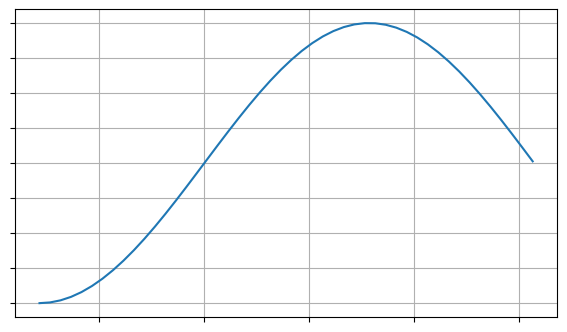

In [3]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x))

# Скрываем числовые значения:
ax.set_xticklabels([]) # по оси X
ax.set_yticklabels([]) # по оси Y

ax.grid()

plt.show()

## Изменяем числовые значения, используя форматоры

- используется метод **.set_major_formator()**
- само форматирование осуществляется с помощью классов, расположеных в **matplotlib.ticker**
- в качестве агрумента метода **.set_major_formator()** используем экземпляры этих классов

### Скрываем тики, используя класс **NullFormator**

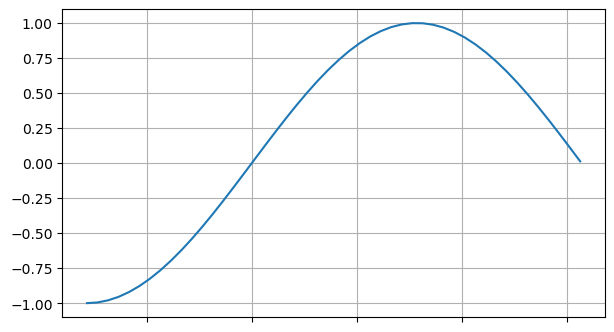

In [8]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x))

# Скрываем числовые значения по оси X:
ax.xaxis.set_major_formatter(NullFormatter())

ax.grid()

plt.show()

### Устанавливаем формат числовых данных подписей для рисок, используя класс **FormatStrFormatter**

В конструкторе класса надо прописать спецификатор

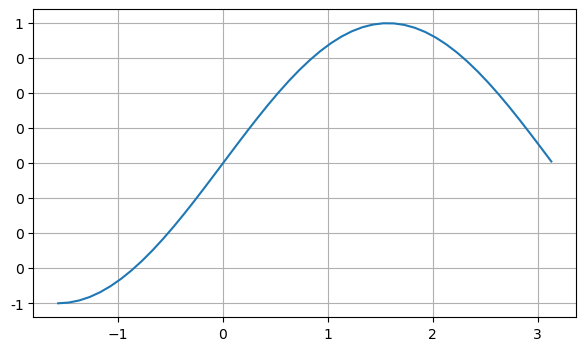

In [13]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x))

# По оси Y будут отображаться только целые числа (дробные значения будут округлены):
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))

ax.grid()

plt.show()

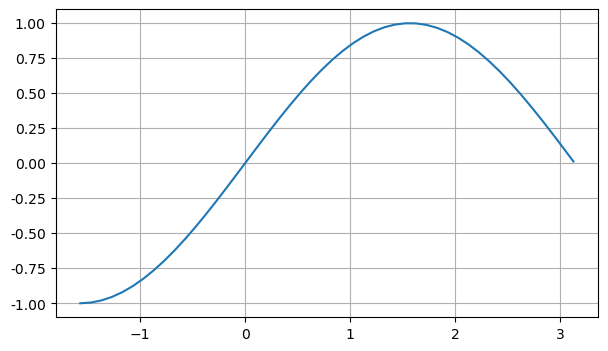

In [15]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x))

# По оси Y будут отображаться вещественные значения, округленные до сотых:
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

ax.grid()

plt.show()

### Устанавливаем формат числовых данных подписей для рисок, используя класс **FuncFormatter**

этот класс вызывает функцию, фоторая и формирует числовые метки

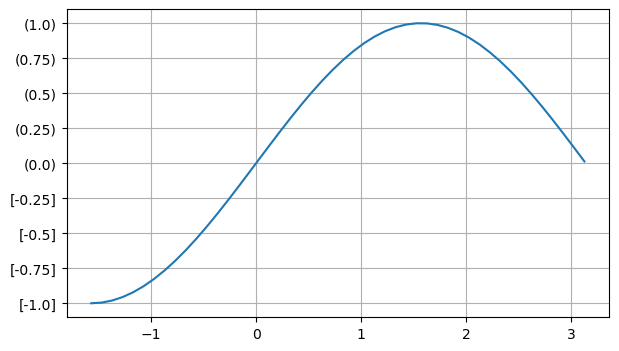

In [17]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

# Зададим функцию, которая помещает отрицательные значения в квадратные скобки, а положительные - к круглые:
def format0y(x, pos):
    return f"[{x}]" if x < 0 else f"({x})"

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x))

# По оси Y будут отображаться вещественные значения, округленные до сотых:
ax.yaxis.set_major_formatter(FuncFormatter(format0y))

ax.grid()

plt.show()

### Устанавливаем формат числовых данных подписей для рисок, используя класс **ScalarFormatter**

- Используется пакетом **matplotlib** по умоолчанию
- Отображает значения по осям такими, какие они есть, с небольшими манипуляциями

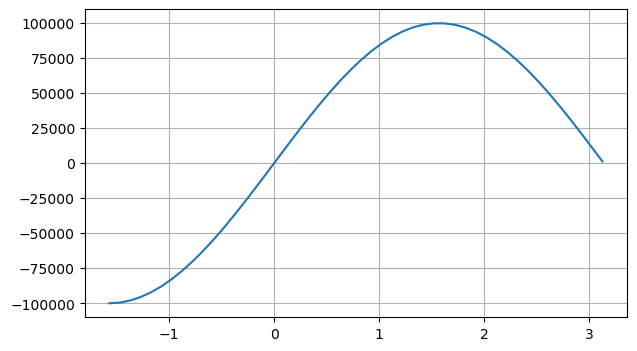

In [24]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

ax.grid()

plt.show()

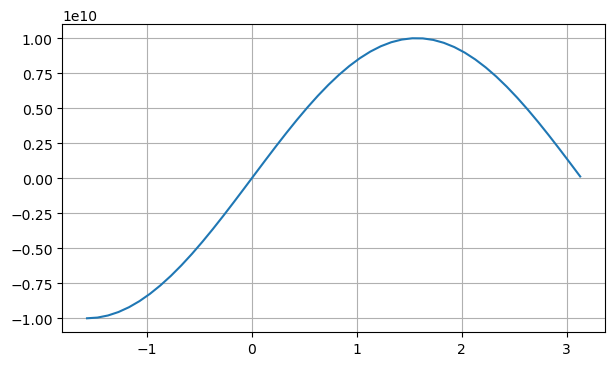

In [25]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e10)

ax.grid()

plt.show()

В результате множитель **1e10** вынесен за скобку, а **1e5** нет.

Но мы хотим, чтобы и **1e5** тоже выносился за скобку:

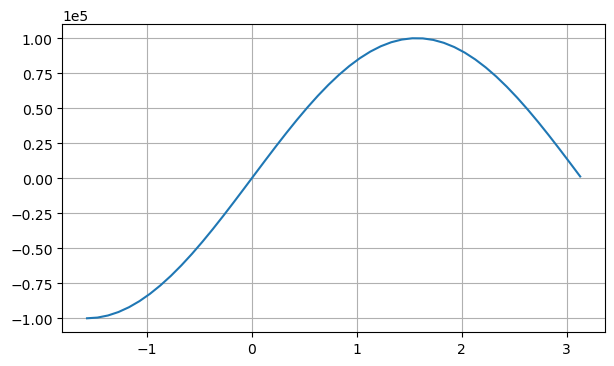

In [29]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

sf = ScalarFormatter()
sf.set_powerlimits((-4, 4))
ax.yaxis.set_major_formatter(sf)

ax.grid()

plt.show()

Настроим такое поведение **глобально** для всех графиков:
- то можно переопределить ключ у словаря **rcParams** пакета **matplotlib** (предварительно его импортировав)

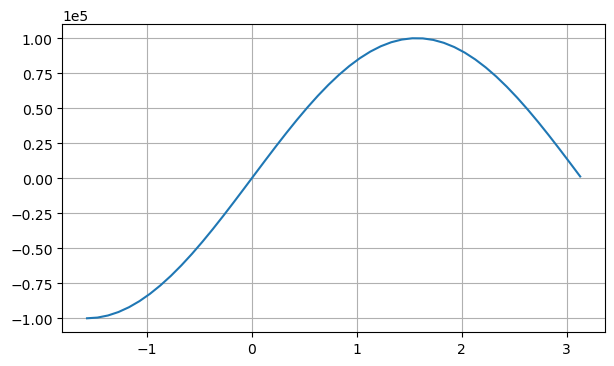

In [30]:
# ... импорты
matplotlib.rcParams["axes.formatter.limits"] = (-4, 4)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

ax.grid()

plt.show()

### Устанавливаем формат числовых данных подписей для рисок, используя класс **FixedFormatter**

Каждой риске оси присваивает строго определенное значение

/tmp/ipykernel_8872/4138553695.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(FixedFormatter([-3, -2, -1, 0, 1, 2, 3]))


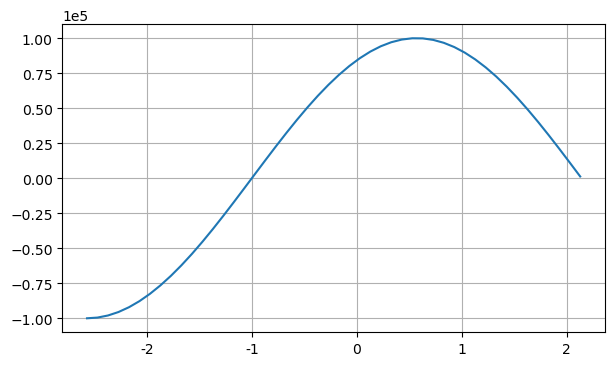

In [34]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

ax.xaxis.set_major_formatter(FixedFormatter([-3, -2, -1, 0, 1, 2, 3]))

ax.grid()

plt.show()

**FixtFormatter** надо использовать совместно с **FixtLocatorom**

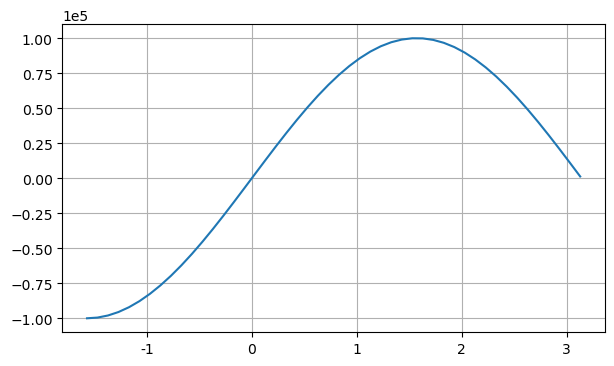

In [35]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

ax.xaxis.set_major_locator(FixedLocator([-3, -2, -1, 0, 1, 2, 3]))
ax.xaxis.set_major_formatter(FixedFormatter([-3, -2, -1, 0, 1, 2, 3]))

ax.grid()

plt.show()

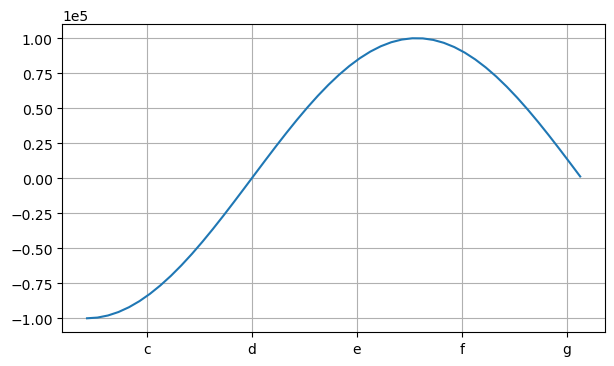

In [40]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

x = np.arange(-np.pi/2, np.pi, 0.1)
ax.plot(x, np.sin(x) * 1e5)

ax.xaxis.set_major_locator(FixedLocator([-3, -2, -1, 0, 1, 2, 3]))
ax.xaxis.set_major_formatter(FixedFormatter(['a', 'b', 'c', 'd', 'e', 'f', 'g']))

ax.grid()

plt.show()